In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import random

import sys
from Bio import Entrez

from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, pearsonr

In [3]:
driver_map_data_all_df = pd.read_csv('DriverMapTPM.tsv',delimiter='\t')
driver_map_data_all_df = driver_map_data_all_df.set_index('Unnamed: 0')
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

#df['Val_Diff'] = df['Val10'] - df['Val1']
'''
# subtract values of negative control from all samples
# not the most pyrhonic way, meh...
driver_map_data_all_df['A2'] = (driver_map_data_all_df['A2']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A3'] = (driver_map_data_all_df['A3']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A4'] = (driver_map_data_all_df['A4']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A5'] = (driver_map_data_all_df['A5']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A6'] = (driver_map_data_all_df['A6']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A7'] = (driver_map_data_all_df['A7']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A8'] = (driver_map_data_all_df['A8']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A9'] = (driver_map_data_all_df['A9']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A10'] = (driver_map_data_all_df['A10']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A12'] = (driver_map_data_all_df['A11']-driver_map_data_all_df['A12'])

driver_map_data_all_df['B2'] = (driver_map_data_all_df['B2']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B3'] = (driver_map_data_all_df['B3']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B4'] = (driver_map_data_all_df['B4']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B5'] = (driver_map_data_all_df['B5']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B6'] = (driver_map_data_all_df['B6']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B7'] = (driver_map_data_all_df['B7']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B8'] = (driver_map_data_all_df['B8']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B9'] = (driver_map_data_all_df['B9']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B10'] = (driver_map_data_all_df['B10']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B12'] = (driver_map_data_all_df['B11']-driver_map_data_all_df['B12'])
'''

driver_map_data_all_df.head()


,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,0.000,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,0.00000,0.546198,48.0853,74.59220,26.27370,1.19616,45.71820,2.83643,122.2470
13331|PEX14,19.08750,14.08670,0.000,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,0.00000,33.521000,26.2342,24.65790,36.15540,15.84860,18.20870,14.82460,34.4379
6630|RAD52,3.66106,4.29017,0.000,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,3.60232,7.170180,10.8381,6.08676,6.61974,3.46454,7.99667,2.27730,8.2883
16802|CLYBL,11.47500,12.58540,34.475,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,...,9.44277,38.90040,11.170000,12.2971,4.87524,24.46830,21.38690,12.00770,3.81662,16.9272
6645|RANBP1,71.64050,79.22280,0.000,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,7.38547,35.480200,105.3570,93.05350,46.65610,24.73280,47.38680,41.90630,118.2290


In [4]:
# create data frame for driver map original samples 
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

#switch_driver_map_data_log_df


,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
Unnamed: 0,,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601,0.000000
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262,0.000000
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035,0.000000
16802|CLYBL,4.078499,3.836106,2.301154,4.924432,4.855118,3.956094,2.858069,4.201626,3.520422,3.653679,5.107479
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844,0.000000


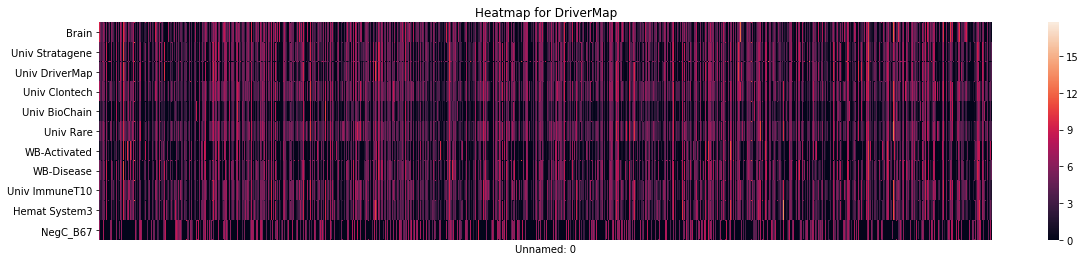

In [5]:
# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# drop NaN values
driver_map_data_log_df.dropna(inplace=True)

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_original_dropped.csv')
driver_map_data_log_df.head()

In [6]:
# operations performed to conferm that all target genes are unique values
gene_list = driver_map_data_df.index.tolist() # number of genes 18989
unique_genes = list(driver_map_data_df.index.unique())
unique_genes_split = driver_map_data_df.index.str.split('|')

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989
len(gene_name_list)

18989

In [7]:
# Make DF for DriverMap original samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']
#driver_map_data_df.reset_index()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# drop NaN values
driver_map_data_log_df.dropna(inplace=True)

min_value_list = list(driver_map_data_df.min())
max_value_list = list(driver_map_data_df.max())
mean_value_list = list(driver_map_data_df.mean())
std_value_list = list(driver_map_data_df.std())
mean_value_list = list(driver_map_data_df.mean())
median_value_list = list(driver_map_data_df.median())
q1_value_list = list(driver_map_data_df.quantile(.25))
q3_value_list = list(driver_map_data_df.quantile(.75))

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_original_dropped.csv')

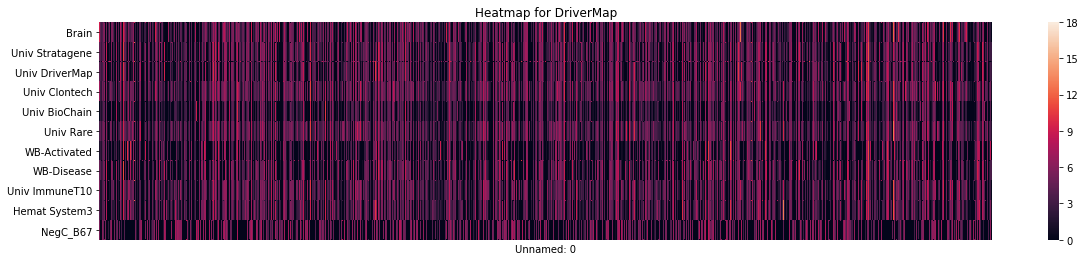

In [8]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_bsa_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_bsa_df.columns.to_list()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = np.log2(driver_map_data_bsa_df)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
# drop NaN values
driver_map_data_bsa_log_df.dropna(inplace=True)
    
#flip axis
switch_driver_map_data_bsa_log_df=driver_map_data_bsa_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_bsa_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_bsa_log_df.to_csv('DM_data_log_BSA_dropped.csv')

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = np.log2(driver_map_data_bsa_df)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
driver_map_data_bsa_log_df.dropna(inplace=True)

described_data_bsa_log_df = pd.DataFrame(driver_map_data_bsa_log_df.describe())
flipped_described_data_bsa_log_df = described_data_bsa_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_bsa_log_df

flipped_described_data_bsa_log_df.to_csv('DM_describe_data_log_BSA_dropped.csv')

In [9]:
described_data_bsa_log_df


,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
count,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000
mean,3.252341,3.283858,3.120958,3.666521,2.519189,3.548107,2.515886,2.929115,3.346877,3.087275,2.594155
std,2.652588,2.655994,2.735125,2.460747,2.467091,2.457766,2.690458,2.786748,2.492429,2.563306,2.938701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172219,0.461822,0.000000,1.651890,0.000000,1.521840,0.000000,0.000000,1.109889,0.332473,0.000000
50%,3.298133,3.296883,3.073618,3.776725,2.153695,3.633640,1.802284,2.716969,3.401712,3.036254,0.000000
75%,5.295245,5.312008,5.251522,5.480443,4.250962,5.342608,4.505567,5.158200,5.164352,4.967634,5.526113
max,16.015493,12.968098,12.964945,14.101352,15.636018,14.509156,14.583547,13.243998,15.196160,14.764224,17.968880


In [10]:
driver_map_data_bsa_log_df.dropna(inplace=True)
driver_map_data_bsa_log_df.head()
len(driver_map_data_bsa_log_df['Brain'])

18989

In [11]:
driver_map_data_log_df.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
Unnamed: 0,,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601,0.000000
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262,0.000000
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035,0.000000
16802|CLYBL,4.078499,3.836106,2.301154,4.924432,4.855118,3.956094,2.858069,4.201626,3.520422,3.653679,5.107479
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844,0.000000


In [12]:
#obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
#obs.shape
#chisquare(obs)
#(array([ 2.        ,  6.66666667]), array([ 0.84914504,  0.24663415]))
a_1 = list(driver_map_data_log_df['Brain'])
#a_2 = list(driver_map_data_bsa_log_df['Brain'])
a_2 = list(driver_map_data_log_df['NegC_B67'])

brain_comparison = np.array([[a_1], [a_2]]).T

chisquare(brain_comparison)

#b_1 = list(driver_map_data_log_df['Univ Stratagene'])
#b_2 = list(driver_map_data_bsa_log_df['Univ Stratagene'])

#stratagene_comparison = np.array([[b_1], [b_2]]).T
#chisquare(stratagene_comparison)

Power_divergenceResult(statistic=array([[41038.18724176, 71962.10521206]]), pvalue=array([[0., 0.]]))

In [13]:
#from scipy import stats
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
#driver_map_data_all_df[['A2', 'B2']].plot(kind='box'), 
#driver_map_data_all_df[['A3', 'B3']].plot(kind='box'), 
#driver_map_data_all_df[['A4', 'B4']].plot(kind='box'), 
#driver_map_data_all_df[['A5', 'B5']].plot(kind='box'), 
#driver_map_data_all_df[['A6', 'B6']].plot(kind='box')

In [14]:
#fig, ax = plt.subplots()
#driver_map_data_all_df[['A7', 'B7']].plot(kind='box'), 
#driver_map_data_all_df[['A8', 'B8']].plot(kind='box'), 
#driver_map_data_all_df[['A9', 'B9']].plot(kind='box'), 
#driver_map_data_all_df[['A10', 'B10']].plot(kind='box'), 
#driver_map_data_all_df[['A11', 'B11']].plot(kind='box')

In [15]:
bins = [-1,0,4,7,17]
bin_labels = ['no read','low','medium','high']

def bin_logs(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
    for j in list(bin_dataf.columns):
        gr_count = bin_dataf.groupby(j)[j].count()
        bin_group[j] = gr_count
    
    return pd.DataFrame.from_dict(bin_group)

In [16]:
binned_dm_data = bin_logs(driver_map_data_log_df)
binned_dm_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
no read,4554,4370,5439,2516,5909,2840,7029,6485,3511,4606,11042
low,6384,7015,6246,7832,7888,7826,6258,5511,8038,7768,1069
medium,6349,6023,5680,7027,4300,6827,4353,5406,6084,5345,5138
high,1702,1581,1624,1614,892,1496,1349,1587,1356,1270,1739


In [17]:
binned_bsa_data = bin_logs(driver_map_data_bsa_log_df)
binned_bsa_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
no read,4576,4073,5316,2556,5738,2765,6897,6336,3402,4379,9912
low,6553,6976,6088,7584,7918,7779,6405,5515,7770,7474,1660
medium,6245,6261,5903,7153,4441,6927,4388,5477,6396,5801,5967
high,1615,1679,1682,1696,892,1518,1299,1661,1421,1335,1449


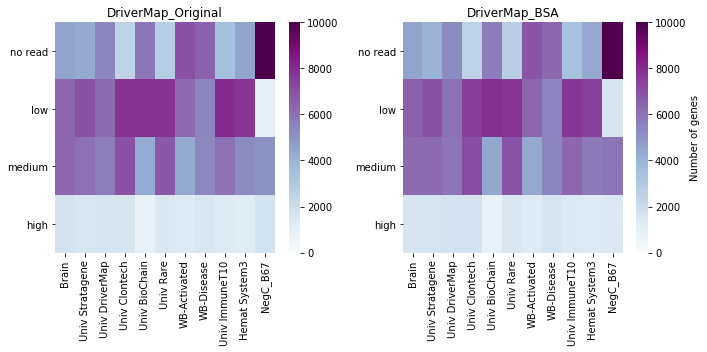

In [18]:
fig = plt.figure(figsize = (10,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(binned_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=10000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original')

sns.heatmap(binned_bsa_data, cmap = 'BuPu', ax = ax2, vmin=0, vmax=10000, cbar_kws = {'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation = 0)
ax2.set_title('DriverMap_BSA')

plt.tight_layout()

In [17]:
np.mean(binned_bsa_data.describe().std())

2558.744969120415

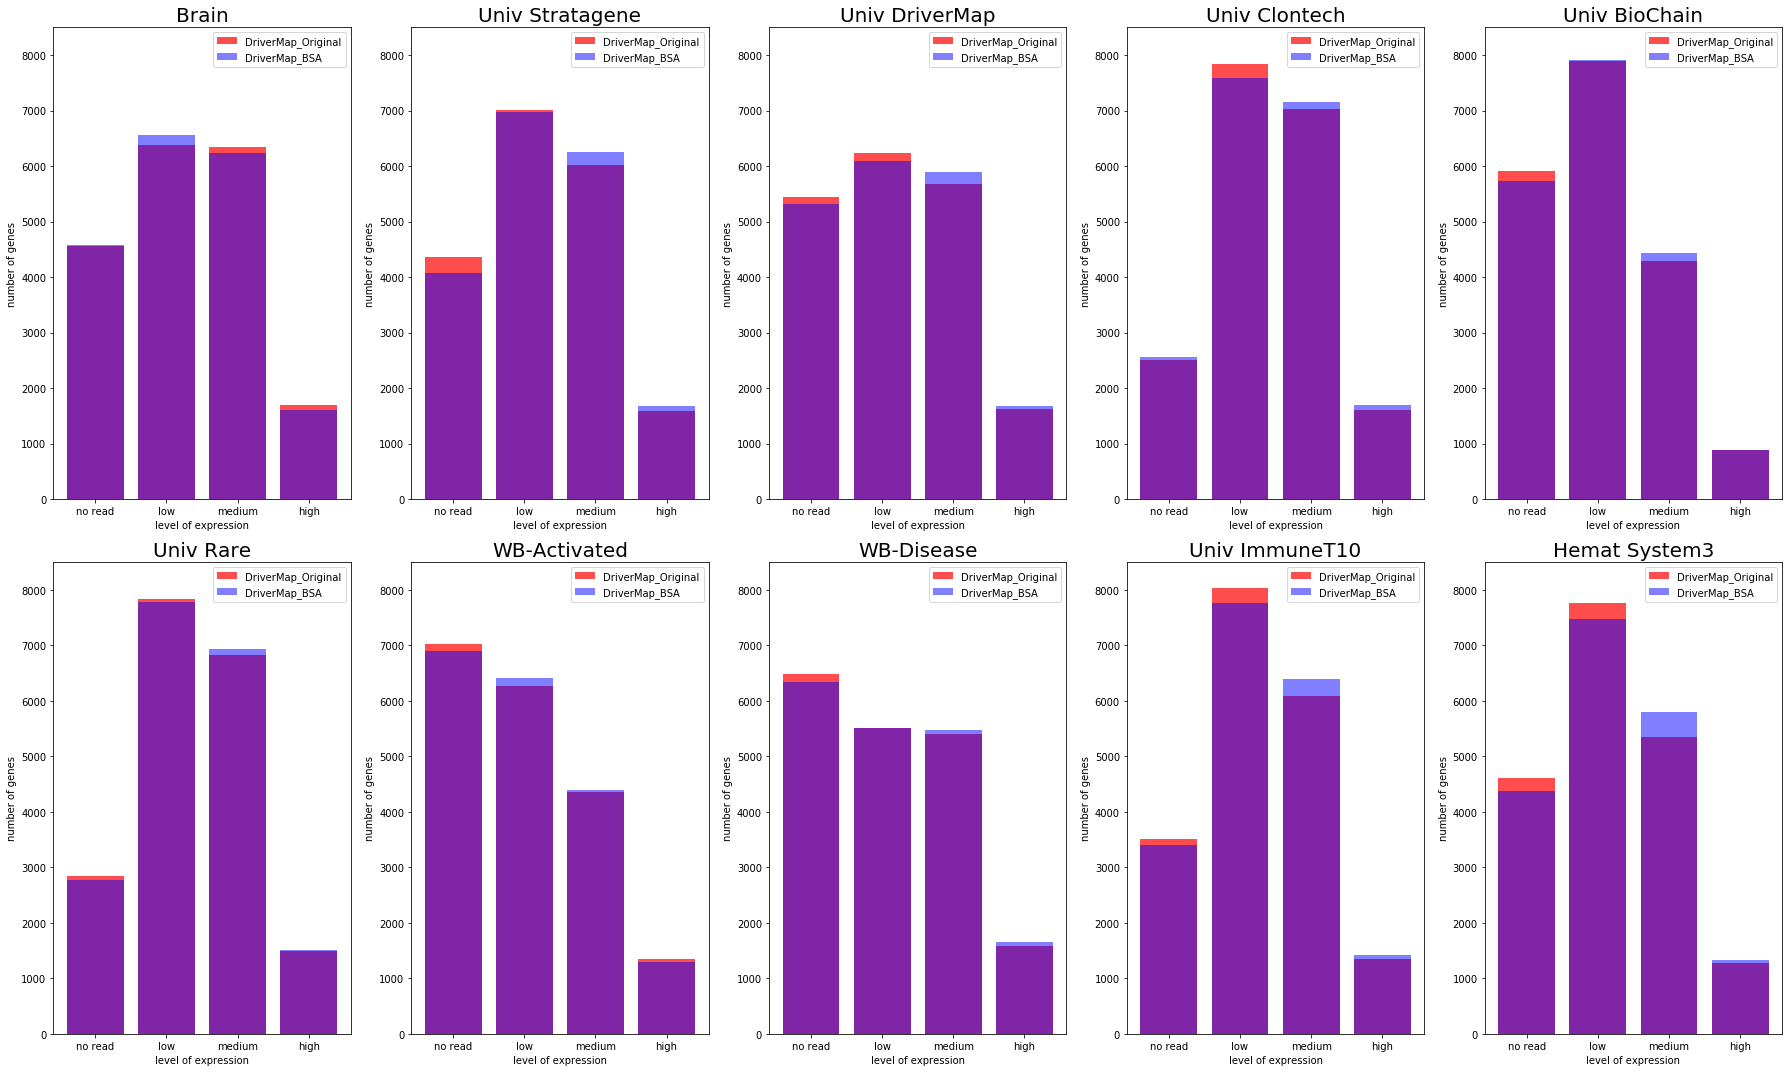

In [18]:
plt.figure(figsize=(25,15))

for i in range(10):
    title_font = {'size':'20'}
    plt.subplot(2,5,i+1)
    plt.bar(x = binned_dm_data.index, height = binned_dm_data.iloc[:,i], alpha=0.7, color='red',label='DriverMap_Original')
    plt.bar(x = binned_bsa_data.index, height = binned_bsa_data.iloc[:,i], alpha=0.5, color='blue',label='DriverMap_BSA')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.ylim(0, 8500)
    plt.legend()
    
plt.tight_layout()

In [ ]:
for i in range(10):
    title_font = {'size':'20'}
    fig, ax = plt.subplots()
    sns.kdeplot(driver_map_data_log_df['Brain'], ax=ax)
    sns.kdeplot(driver_map_data_bsa_log_df['Brain'], ax=ax)
    sns.kdeplot(driver_map_data_log_df['Univ Stratagene'], ax=ax)
    sns.kdeplot(driver_map_data_bsa_log_df['Univ Stratagene'], ax=ax)
    
    ax = sns.kdeplot(driver_map_data_log_df['Brain'], driver_map_data_bsa_log_df['Brain'])


In [ ]:
fig1, ax = plt.subplots()
sns.kdeplot(driver_map_data_log_df['Univ Stratagene'], ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df['Univ Stratagene'], ax=ax)
sns.kdeplot(driver_map_data_log_df['NegC_B67'], ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df['NegC_B67'], ax=ax)

In [ ]:
ax = sns.kdeplot(driver_map_data_log_df['Brain'])
ax = sns.kdeplot(driver_map_data_bsa_log_df['Brain'])

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(driver_map_data_log_df, ax=ax)
sns.kdeplot(driver_map_data_bsa_log_df, ax=ax)

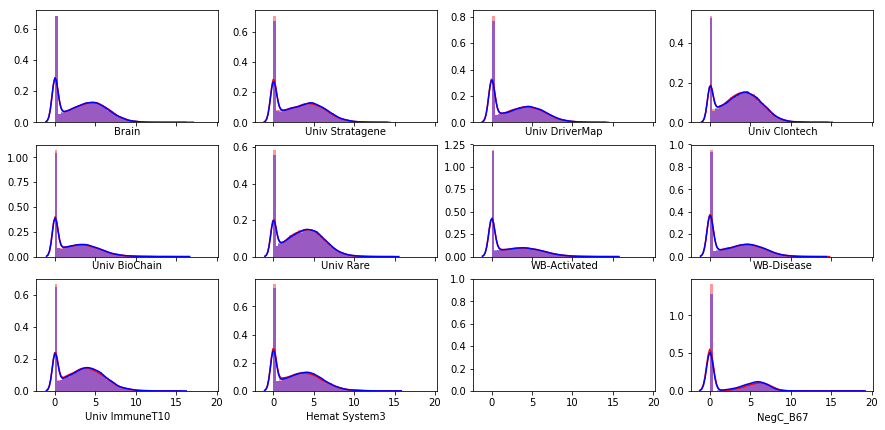

In [19]:
f, axes = plt.subplots(3, 4, figsize=(15, 7), sharex=True)
['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

ax = sns.distplot( driver_map_data_log_df['Brain'] , color="red", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Brain'] , color="blue", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Stratagene'] , color="red", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Stratagene'] , color="blue", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_log_df['Univ DriverMap'] , color="red", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ DriverMap'] , color="blue", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_log_df['Univ Clontech'] , color="red", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Clontech'] , color="blue", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_log_df['Univ BioChain'] , color="red", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ BioChain'] , color="blue", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Rare'] , color="red", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Rare'] , color="blue", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_log_df['WB-Activated'] , color="red", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Activated'] , color="blue", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_log_df['WB-Disease'] , color="red", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Disease'] , color="blue", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_log_df['Univ ImmuneT10'] , color="red", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ ImmuneT10'] , color="blue", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_log_df['Hemat System3'] , color="red", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Hemat System3'] , color="blue", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_log_df['NegC_B67'] , color="red", ax=axes[2, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['NegC_B67'] , color="blue", ax=axes[2, 3])


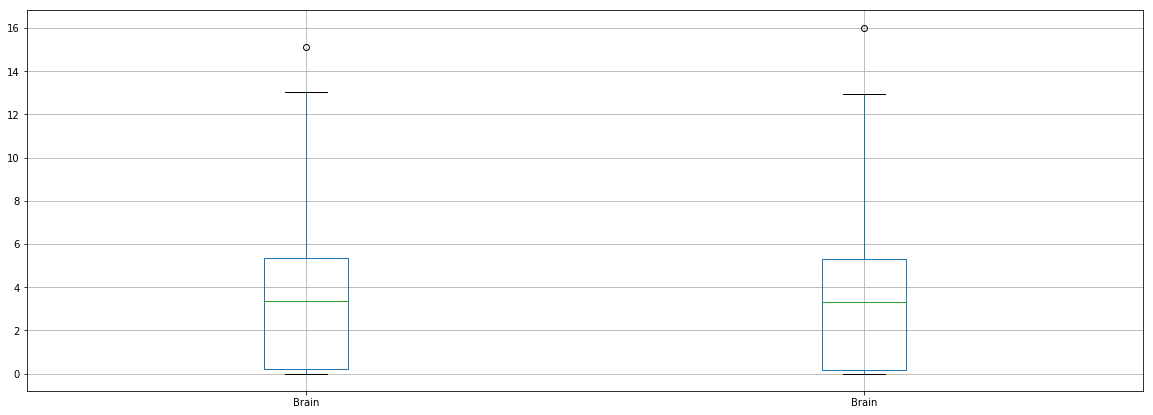

In [20]:
tempb = driver_map_data_log_df['Brain']
tempc = driver_map_data_bsa_log_df['Brain']
tempd = pd.concat((tempb, tempc), axis=1)
plt.figure(figsize=(20,7))
tempd.boxplot()

In [21]:
# t-test for binned data
idx = binned_dm_data.index.intersection(binned_bsa_data.index)
t_test_bins_df = pd.DataFrame(ttest_ind(binned_dm_data.loc[idx], binned_bsa_data.loc[idx], axis=1), 
                              index=['t-stat','p-value'], columns = bin_labels)

#Ttest_indResult(
#    statistic=array([-0.31240597,  0.66835531, -0.17359046, -0.21035294]), 
#    pvalue=array([0.75796591, 0.51154742, 0.86393227, 0.83552046]))
flip_t_test_bins_df = t_test_bins_df.transpose()

flip_t_test_bins_df.describe()
t_test_bins_df
# no real statistical difference

,no read,low,medium,high
t-stat,0.222299,0.012655,-0.583412,-0.032445
p-value,0.826336,0.990028,0.566137,0.974439


In [22]:
#t-test for log data
index = ['Original', 'BSA']

idx = driver_map_data_log_df.index.intersection(driver_map_data_bsa_log_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_log_df.loc[idx], driver_map_data_bsa_log_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'])
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 871 genes have statistical significance after values were dropped
#flip_t_test_df.describe()

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


468

In [23]:
pearson_corr_bins = pd.DataFrame(columns = binned_dm_data.columns, index = binned_dm_data.columns)

for col in pearson_corr_bins.columns:
    for idx in pearson_corr_bins.index:
        correl_signif = pearsonr(binned_dm_data[col], binned_bsa_data[idx])
        correl = correl_signif[0]
        pearson_corr_bins.loc[idx, col] = correl

pearson_corr_bins.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,NegC_B67
Brain,0.998761,0.99172,0.961959,0.901411,0.840553,0.925354,0.722052,0.815771,0.946637,0.948532,0.0739636
Univ Stratagene,0.984625,0.995437,0.917189,0.953863,0.818704,0.971132,0.643031,0.724214,0.982757,0.95686,-0.0801883
Univ DriverMap,0.97022,0.949255,0.996623,0.775667,0.880001,0.812283,0.845812,0.928124,0.861964,0.91956,0.293935
Univ Clontech,0.902974,0.918795,0.751205,0.998878,0.629222,0.994899,0.375925,0.484222,0.956538,0.851872,-0.337975
Univ BioChain,0.835344,0.888033,0.922983,0.684309,0.999058,0.73267,0.907671,0.844587,0.847247,0.956517,0.150319


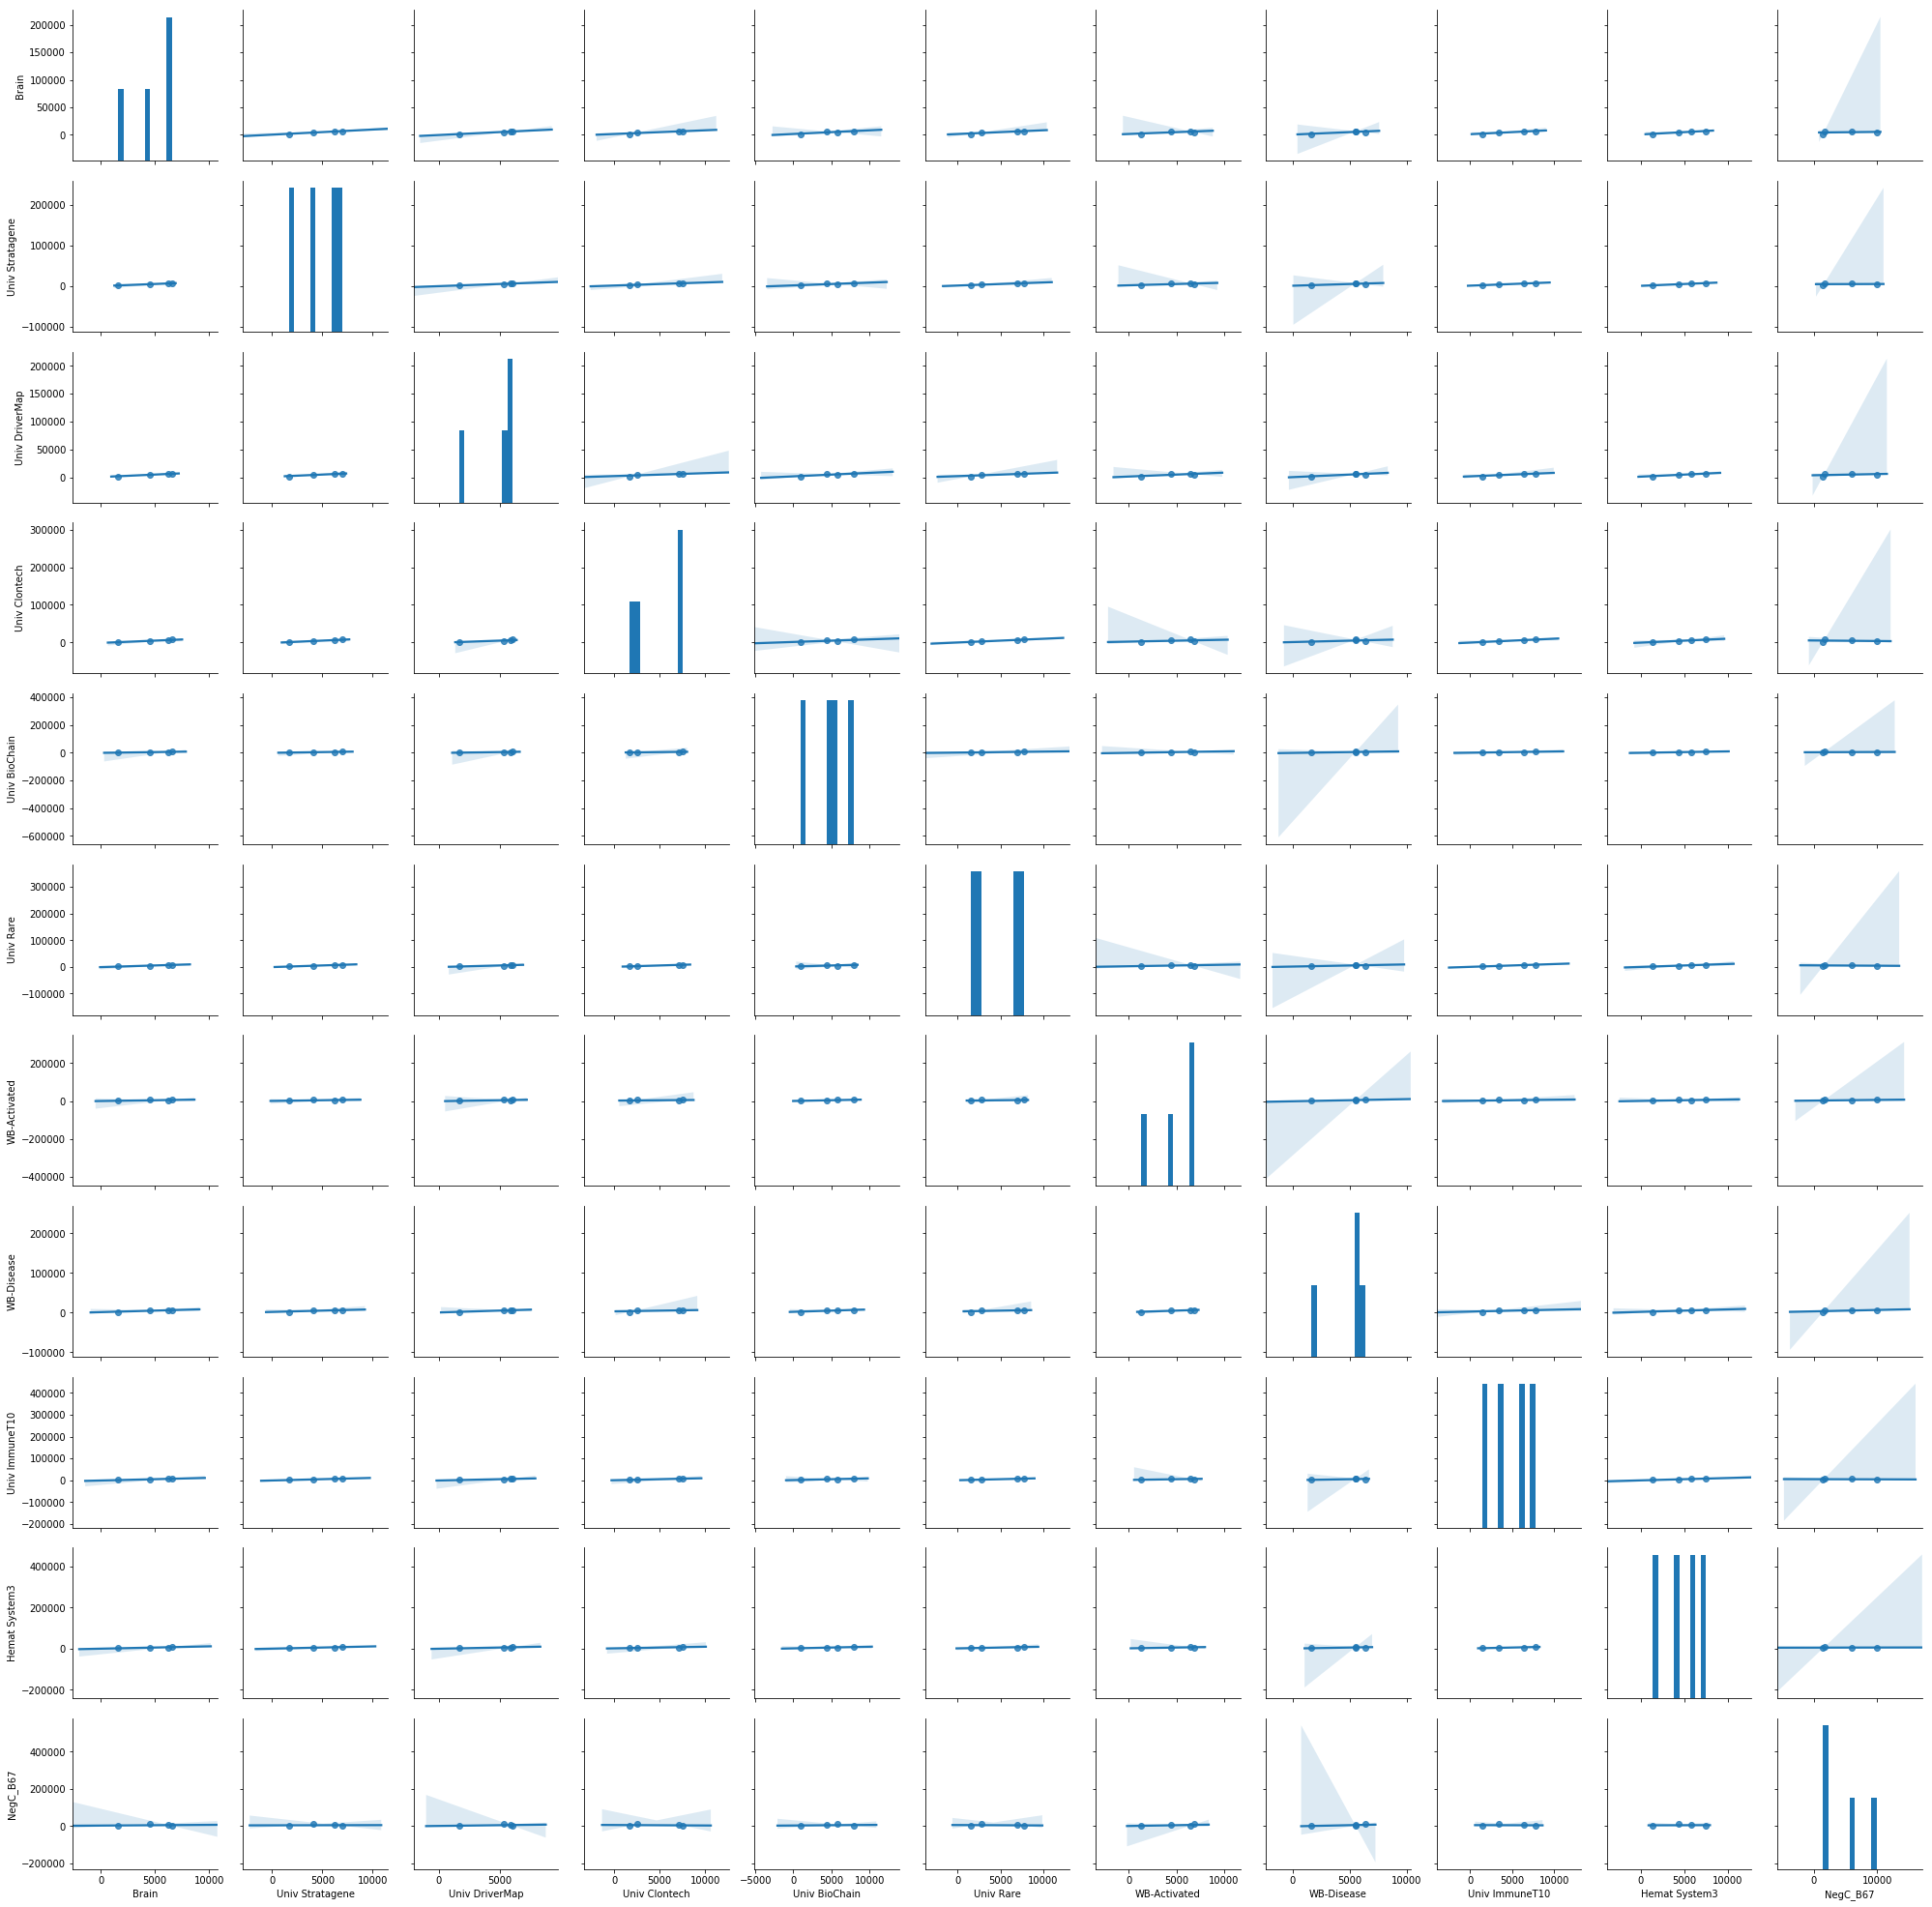

In [24]:
sns.pairplot(binned_bsa_data, kind="reg")
plt.show()

In [20]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# Create a pair grid instance
grid = sns.PairGrid(data= binned_dm_data, hight = 4)

# Map the plots to the locations
grid = grid.map_upper(sns.regplot, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

TypeError: __init__() got an unexpected keyword argument 'hight'

In [21]:
# Create a pair grid instance
grid = sns.PairGrid(data= binned_bsa_data, hieght = 4)

# Map the plots to the locations
grid = grid.map_upper(sns.regplot, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

TypeError: __init__() got an unexpected keyword argument 'hight'